In [1]:
#Impor Libraries
import os
import pandas as pd
import numpy as np
import plotly.express as px

## Define and create paths

In [2]:
#Get working directory
current_dir = os.getcwd()
#Define path to results folder
results_dir = os.path.join(current_dir, 'results')
os.makedirs(results_dir, exist_ok=True)

## Read in the data

In [4]:
ai_jobs_data_filename = os.path.join(current_dir, "ai_jobs_cleaned_dataset.csv")
ai_jobs_df = pd.read_csv(ai_jobs_data_filename)
ai_jobs_df.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,Senior,Contract,China,M,China,Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,18/10/2024,07/11/2024,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,Entry level,Contract,Canada,M,Ireland,Fully remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,20/11/2024,11/01/2025,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,Mid level,Freelance,Switzerland,L,South Korea,Fully on site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,18/03/2025,07/04/2025,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,Senior,Freelance,India,M,India,Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,23/12/2024,24/02/2025,1345,8.6,Future Systems
4,AI00005,AI Consultant,62817.6,USD,Entry level,Part time,France,S,Singapore,Fully remote,"MLOps, Java, Tableau, Python",Master,0,Media,15/04/2025,23/06/2025,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,142110.1,USD,Senior,Contract,Germany,M,Germany,Hybrid,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,31/08/2024,04/10/2024,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,106757.8,USD,Mid level,Freelance,United Kingdom,S,United Kingdom,Fully on site,"R, Docker, MLOps",Associate,3,Gaming,29/12/2024,28/02/2025,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,81236.0,USD,Entry level,Freelance,France,L,France,Fully on site,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,07/06/2024,01/07/2024,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710.0,USD,Senior,Contract,Singapore,L,Singapore,Fully on site,"Hadoop, Git, Mathematics, Python",PhD,7,Government,04/11/2024,24/11/2024,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557.0,USD,Senior,Part time,Austria,M,Austria,Fully on site,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,20/10/2024,06/11/2024,2340,5.8,Cloud AI Solutions


## Total AI Jobs Over Month

This line chart visualizes the trend in AI job postings over time, aggregated monthly. 

In [10]:
# Convert posting_date to datetime
ai_jobs_df['posting_date'] = pd.to_datetime(ai_jobs_df['posting_date'], dayfirst=True)

# Extract and order months
ai_jobs_df['month'] = ai_jobs_df['posting_date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
ai_jobs_df['month'] = pd.Categorical(ai_jobs_df['month'], categories=month_order, ordered=True)

# Group by month and count jobs
ai_monthly_jobs = ai_jobs_df.groupby('month').size().reset_index(name='total_jobs').sort_values('month')
ai_monthly_jobs

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20492\1787430825.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ai_monthly_jobs = ai_jobs_df.groupby('month').size().reset_index(name='total_jobs').sort_values('month')


,month,total_jobs
0,January,1917
1,February,1767
2,March,1854
3,April,1927
4,May,955
5,June,938
6,July,959
7,August,958
8,September,895
9,October,949


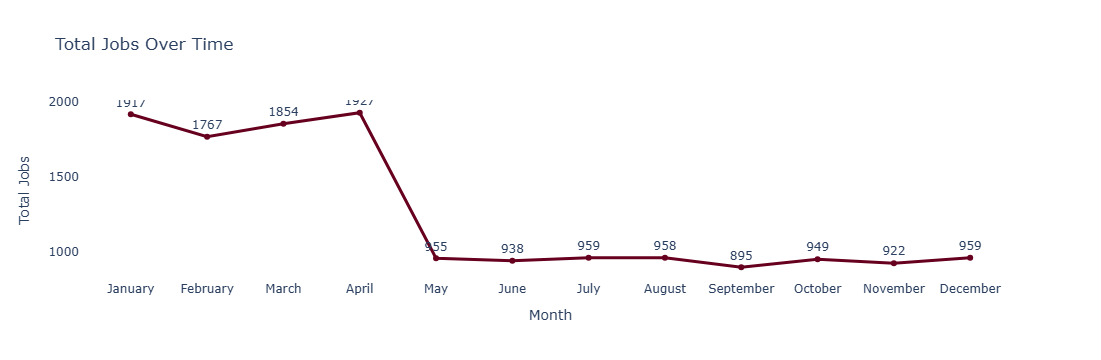

In [23]:
# Create interactive line chart
fig_time = px.line(
    monthly_job_counts,
    x='month',
    y='total_jobs',
    title='Total Jobs Over Time',
    markers=True,
    text='total_jobs',
    color_discrete_sequence=px.colors.sequential.RdBu,
)

fig_time.update_traces(textposition='top center', line=dict(width=3))

fig_time.update_layout(
    height=500,
    plot_bgcolor='white',
    xaxis_title='Month',
    yaxis_title='Total Jobs',
    showlegend=False
)

fig_time.update_xaxes(showgrid=False)
fig_time.update_yaxes(showgrid=False)

fig_time.show()

## Total Jobs By Company_location

This bar chart shows the top 10 countries where companies are most actively hiring for AI roles. It highlights geographical hotspots for AI employment.

In [5]:
ai_jobs_location_df = ai_jobs_df.groupby('company_location').size().reset_index(name='job_count')
ai_jobs_location_df

,company_location,job_count
0,Australia,732
1,Austria,765
2,Canada,769
3,China,763
4,Denmark,778
5,Finland,733
6,France,769
7,Germany,814
8,India,754
9,Ireland,750


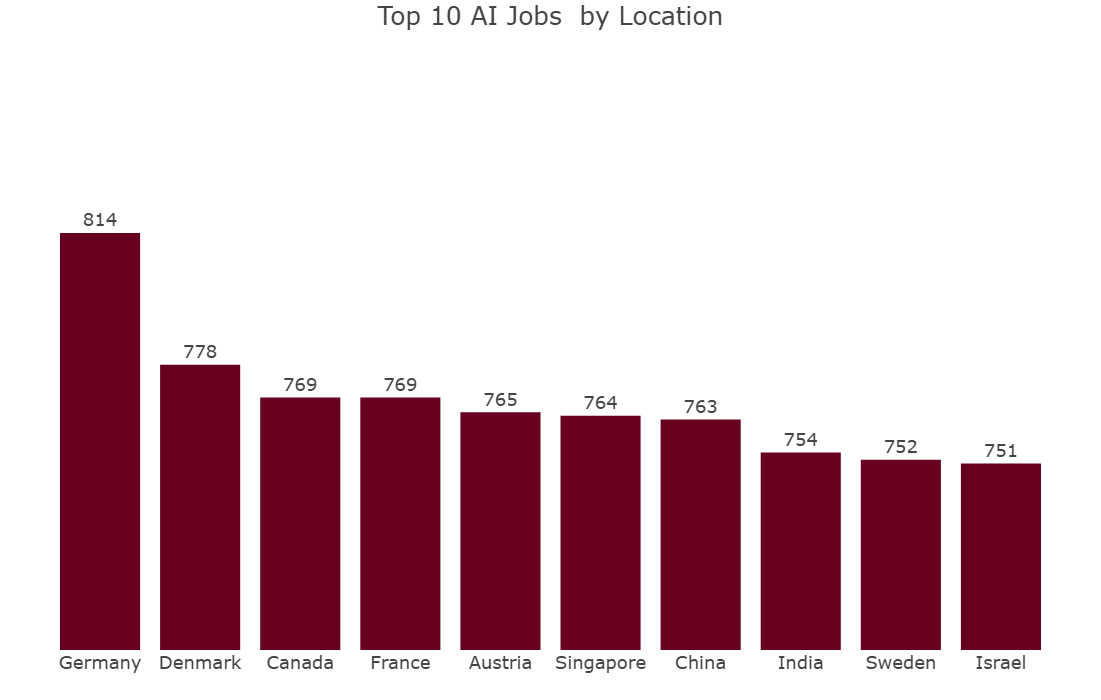

In [25]:
num = 10
Top_ai_jobs = ai_jobs_location_df.sort_values(by='job_count', ascending=False).head(num)

fig = px.bar(
    Top_ai_jobs,
    x="company_location",
    y="job_count",
    title=f"Top {num} AI Jobs  by Location ",
    height=700,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='job_count'
)

fig.update_layout(
    template="presentation",
    xaxis_title=" ",
    yaxis_title=" ",
    margin=dict(l=50, r=50, t=50, b=50),
    yaxis=dict(range=[700, Top_ai_jobs['job_count'].max() + 50],showticklabels=False, showgrid = False)
)

fig.update_traces(textposition='outside')

fig.show()

## Average salary by Experience Level

This bar chart compares the average salary (in USD) across different experience levels such as Entry Level, Mid Level, and Senior. It provides insight into how compensation scales with experience.

In [24]:
avg_salary_by_experience = ai_jobs_df.groupby('experience_level')['salary_usd'].mean().reset_index()
avg_salary_by_experience = avg_salary_by_experience.sort_values(by='salary_usd', ascending=False)
avg_salary_by_experience

,experience_level,salary_usd
1,Expert,195605.868670
3,Senior,127431.064170
2,Mid level,91816.733621
0,Entry level,65828.636756


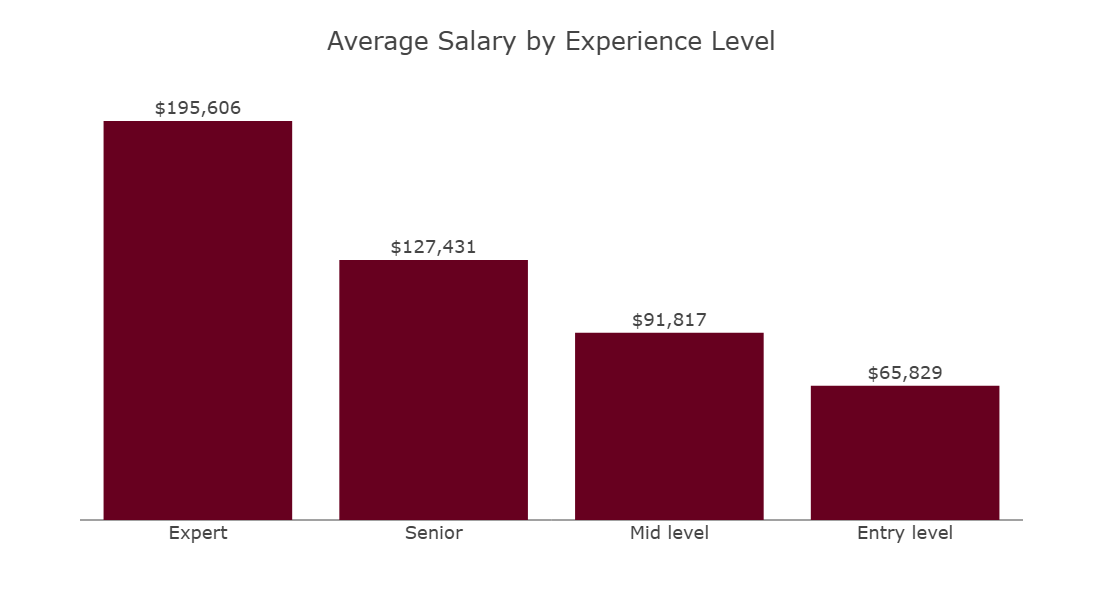

In [22]:
fig = px.bar(
    avg_salary_by_experience,
    x='experience_level',
    y='salary_usd',
    title='Average Salary by Experience Level',
    text='salary_usd',
    color_discrete_sequence=px.colors.sequential.RdBu,
    height=600,
    width=800
)

fig.update_layout(
    template='presentation',
    xaxis_title='',  
    yaxis_title=' ',
    yaxis=dict(showgrid=False, showticklabels=False)
)

fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside')  # formatted salary labels

fig.show()

## Education Required by Total Jobs

This pie chart displays the distribution of minimum education requirements for AI job roles.

In [26]:
education_counts = ai_jobs_df['education_required'].value_counts().reset_index()
education_counts.columns = ['education_required', 'job_count']
education_counts

,education_required,job_count
0,Bachelor,3789
1,Associate,3785
2,Master,3748
3,PhD,3678


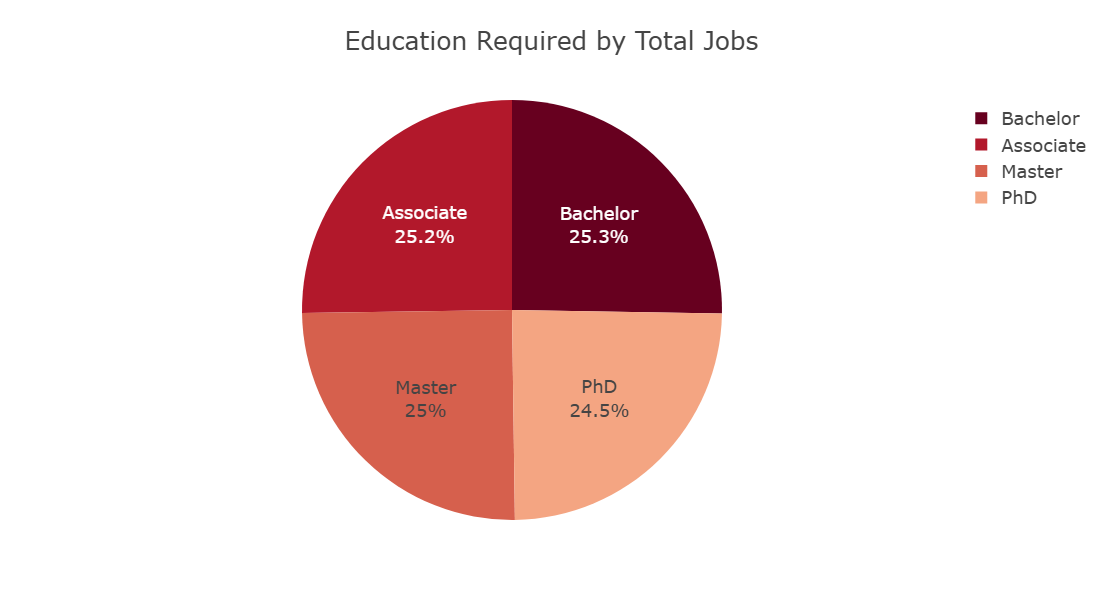

In [27]:
fig = px.pie(
    education_counts,
    names='education_required',
    values='job_count',
    title='Education Required by Total Jobs',
    color_discrete_sequence=px.colors.sequential.RdBu
)

fig.update_traces(
    textinfo='label+percent',
    textposition='inside'
)

fig.update_layout(
    template='presentation',
    height=600,
    width=700
)

fig.show()

## Employment type by Total Jobs

This donut chart visualizes the distribution of AI jobs by employment type, such as full-time, part-time, freelance, or contract. It gives a sense of the flexibility and nature of the job market.

In [14]:
employmenttype_counts = ai_jobs_df['employment_type'].value_counts().reset_index()
employmenttype_counts.columns = ['employment_type', 'job_count']
employmenttype_counts

,employment_type,job_count
0,Full time,3812
1,Freelance,3758
2,Contract,3721
3,Part time,3709


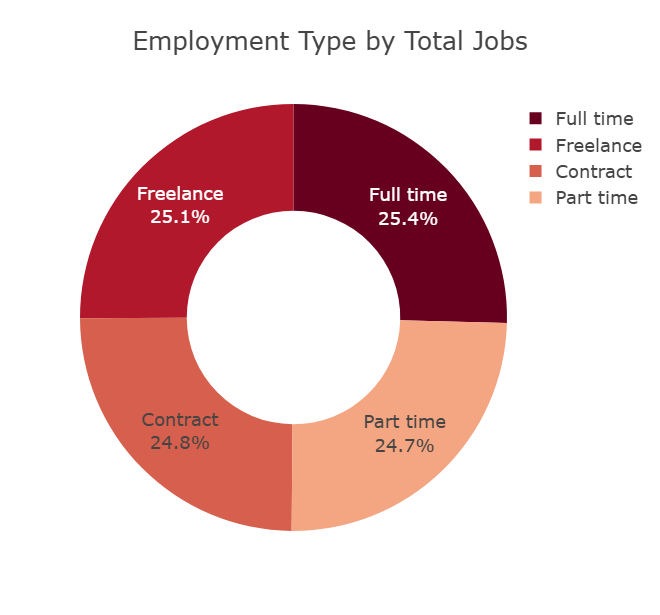

In [19]:
fig = px.pie(
    employmenttype_counts,
    names='employment_type',
    values='job_count',
    title='Employment Type by Total Jobs',
    color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5
)

fig.update_traces(
    textinfo='label+percent',
    textposition='inside'
)

fig.update_layout(
    template='presentation',
    height=600,
    width=700
)

fig.show()

## Top Hiring Companies

This horizontal bar chart showcases the companies with the most AI job postings. It highlights major employers and leaders in the AI industry.

In [28]:
company_counts = ai_jobs_df.groupby('company_name').size().reset_index(name='job_count').sort_values(by='job_count',ascending = True)
company_counts

,company_name,job_count
2,Algorithmic Solutions,885
7,DeepTech Ventures,897
6,DataVision Ltd,909
3,Autonomous Tech,918
10,Machine Intelligence Group,922
11,Neural Networks Co,922
1,Advanced Robotics,925
14,Smart Analytics,927
12,Predictive Systems,947
4,Cloud AI Solutions,951


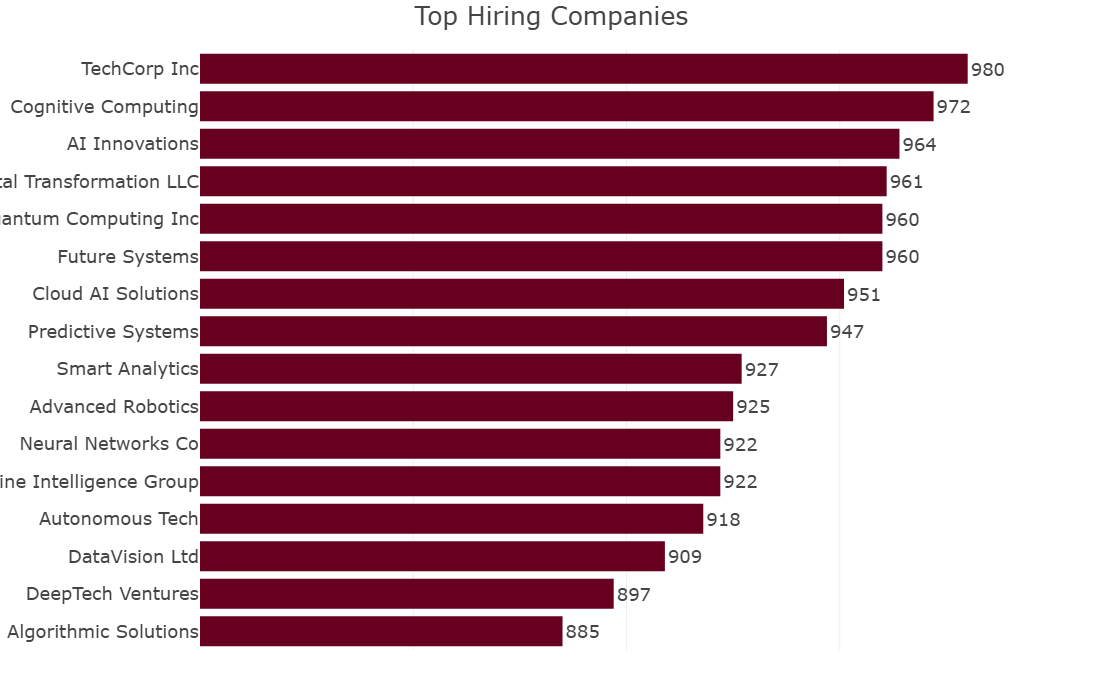

In [29]:
fig = px.bar(
    company_counts,
    x="job_count",
    y="company_name",
    title="Top Hiring Companies",
    orientation='h',
    height=700,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='job_count'
)

fig.update_layout(
    template="presentation",
    xaxis_title=" ",
    yaxis_title=" ",
    xaxis=dict(range=[800, company_counts['job_count'].max() + 20], showticklabels=False),
    margin=dict(l=200, r=50, t=50, b=50),
    yaxis=dict(showticklabels=True, showgrid=False)
)

fig.update_traces(textposition='outside')

fig.show()

## AI Employment Opportunities by Industry

This horizontal bar chart breaks down AI job openings by industry sector, such as Healthcare, Finance, Media, and more. It shows where AI talent is most in demand.

In [29]:
industry_counts = ai_jobs_df.groupby('industry').size().reset_index(name='job_count').sort_values(by='job_count',ascending = True)
industry_counts

,industry,job_count
2,Education,956
8,Manufacturing,962
5,Gaming,967
3,Energy,976
4,Finance,984
7,Healthcare,997
13,Telecommunications,997
14,Transportation,997
6,Government,998
10,Real Estate,1007


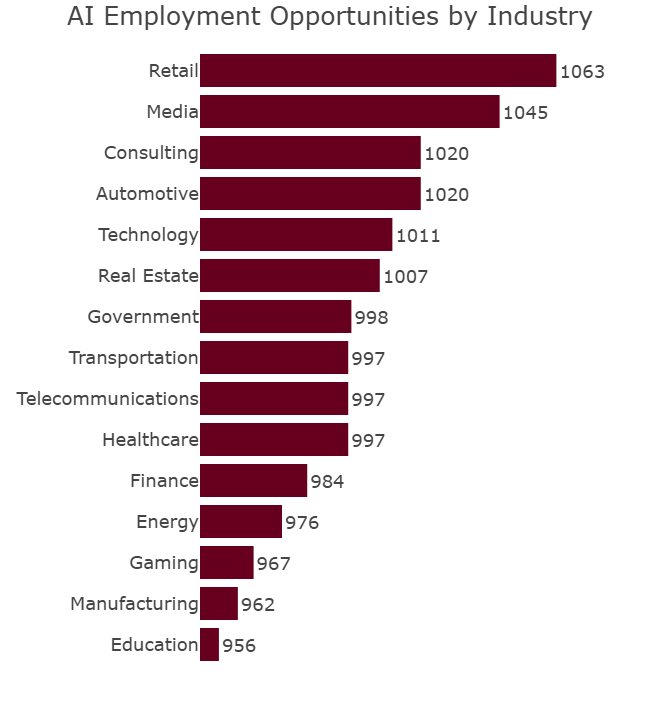

In [30]:
fig = px.bar(
    industry_counts,
    x="job_count",
    y="industry",
    title="AI Employment Opportunities by Industry",
    orientation='h',
    height=700,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='job_count'
)

fig.update_layout(
    template="presentation",
    xaxis_title=" ",
    yaxis_title=" ",
    xaxis=dict(range=[950, company_counts['job_count'].max() + 100], showticklabels=False, showgrid=False),
    margin=dict(l=200, r=50, t=50, b=50),
    yaxis=dict(showticklabels=True, showgrid=False)
)

fig.update_traces(textposition='outside')

fig.show()


## Work Arrangements

This donut chart displays the breakdown of work arrangements: fully remote, hybrid, or fully on-site. Offering insight into remote work trends in AI roles.

In [21]:
workarrangements_counts = ai_jobs_df.groupby('remote_ratio').size().reset_index(name='job_count').sort_values(by='job_count',ascending = True)
workarrangements_counts

,remote_ratio,job_count
1,Fully remote,4920
2,Hybrid,5005
0,Fully on site,5075


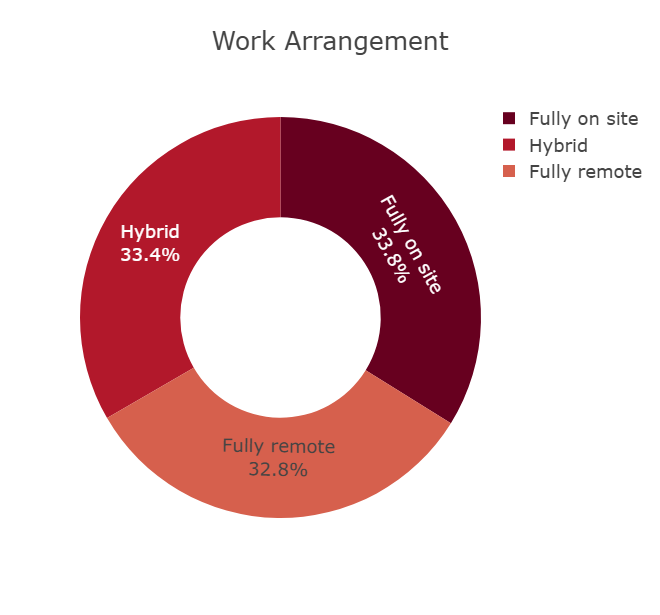

In [22]:
fig = px.pie(
    workarrangements_counts,
    names='remote_ratio',
    values='job_count',
    title='Work Arrangement',
    color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5
)

fig.update_traces(
    textinfo='label+percent',
    textposition='inside'
)

fig.update_layout(
    template='presentation',
    height=600,
    width=700
)

fig.show()

## Top AI Jobs

This bar chart lists the most common AI job titles in the dataset, showing which roles are most in demand.

In [33]:
ai_jobs_counts = ai_jobs_df.groupby('job_title').size().reset_index(name='job_count').sort_values(by='job_count',ascending = True)
ai_jobs_counts

,job_title,job_count
1,AI Consultant,704
11,Deep Learning Engineer,718
10,Data Scientist,720
7,Computer Vision Engineer,724
13,ML Ops Engineer,725
5,AI Specialist,728
17,Principal Data Scientist,734
18,Research Scientist,742
2,AI Product Manager,743
9,Data Engineer,749


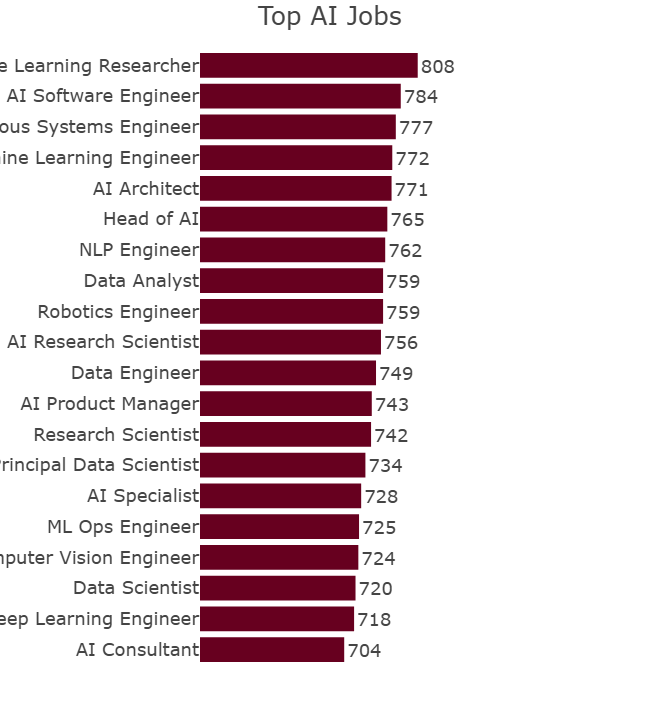

In [34]:
fig = px.bar(
    ai_jobs_counts,
    x="job_count",
    y="job_title",
    title="Top AI Jobs",
    orientation='h',
    height=700,
    width=1000,
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='job_count'
)

fig.update_layout(
    template="presentation",
    xaxis_title=" ",
    yaxis_title=" ",
    xaxis=dict(range=[500, company_counts['job_count'].max() + 100], showticklabels=False, showgrid=False),
    margin=dict(l=200, r=50, t=50, b=50),
    yaxis=dict(showticklabels=True, showgrid=False)
)

fig.update_traces(textposition='outside')

fig.show()